<a href="https://colab.research.google.com/github/alirezakhaleghianaghizi/ml_1401/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://www.sharif.edu/documents/20124/0/logo-fa-IR.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2023<br>
<font color=3C99D size=5>
    Practical Assignment 5 - Logistic Regression <br>
<font color=696880 size=4>
    Amirreza Mirzaei

____

The output of some cells have not been removed. You can use them to check your code.

# Personal Data

In [5]:
# Set your student number and name
student_number = '99101462'
Name = 'alireza'
Last_Name = 'khaleghi'

## Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

Don't import any other library.

# Logistic Regression (35 Points)

<font size=4>
Author: Amirreza Mirzaei
<br/>
<font color=red>
Please run all the cells.
</font>
</font>
<br/>
</div>

In this notebook you will implement Logistic Regression from scratch. First you will implement all the needed function in order to use Logistic Regression. After that you will test your implementation on a dummy dataset and visualize the model boundary. Then you will do the same on a tweet sentiment classification dataset.

### 1: Creating Dummy Dataset

We will use sklearn library to create a simple 2D dataset. The dataset is almost linearly separable so we expect to get a high accuracy if we use a linear classification model such as logistic regression.

shape of X=(600, 2)
shape of y=(600,)


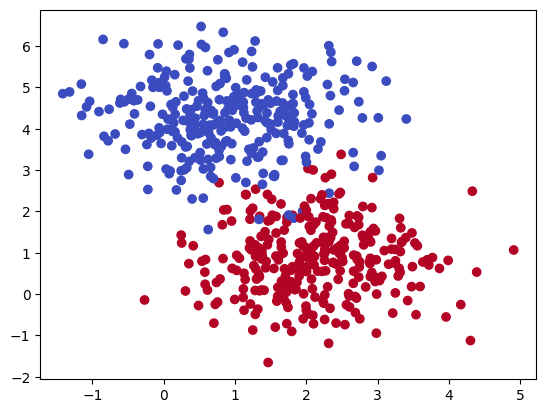

In [6]:
X, y = make_blobs(n_samples=600, centers=2, random_state=0, cluster_std=0.90)


print(f'shape of X={X.shape}')
print(f'shape of y={y.shape}')

plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.show()

### 2 : Implementing model (20 points)

As you know the parameters of a logistic regression model are the vector $\mathbf{w}$ and the scalar $\mathbf{b}$. we use the function below to assign a scalar to each data point. This scalar can be interpreted as the probability of the datapoint being a member of the positive class.

$$f_{\mathbf{w},b}(x)=g(\mathbf{w}\cdot\mathbf{x}+b)$$

Where the function $\mathbf{g}$ is the function below which is called the sigmoid function.
$$g(z) = \frac{1}{1+e^{-z}}$$


Implement the sigmoid function below.

In [7]:
# 2 points
import math
def sigmoid(z):
    '''
    Input:
        z : numpy array with shape (m,)
    Output:
        g : sigmoid of every element of z with shape (m,)
    '''
    a=[]
    for i in z:
        a.append(1/(1+math.exp(-i)))
    return np.array(a)

In [8]:
sigmoid(np.array([-1,0,1]))

array([0.26894142, 0.5       , 0.73105858])

Next implement a function to compute the function f.

In [10]:
# 3 points
def f_wb(X, w, b):
    '''
    Input:
        X : numpy array with shape (m,d)
        w : numpy array with shape (d,)
        b : float
    Output:
        f : numpy array with shape (n,)
    '''
    A=np.dot(X,w)+b
    return sigmoid(A)

X = np.array([[1,2] , [3,4]])
w = np.array([4, 2])
b = 3

f_wb(X, w, b)

array([0.9999833, 1.       ])

Next implement a function that calculate the accuracy of our model. If f_wb for a datapoint is more than a threshold(usually 0.5) the model must classify it as positive(1) otherwise it must classify it as negative(0).

In [12]:
# 3 points
def accuracy(X, y, w, b, prob_threshold=0.5):
    '''
    Input:
        X : numpy array with shape (m,d)
        y : numpy array with shape (m,)
        w : numpy array with shape (d,)
        b : float
    Output:
        cost : accuracy of our model.
    '''
    out=f_wb(X, w, b)
    
    corr=0
    for i in range(len(y)):
      if out[i]>prob_threshold:
        out[i]=1
      else:
        out[i]=0
      if y[i]==out[i]:
        corr += 1
    return corr/len(y)

x = np.array([[1,2] , [3,4], [5,6], [7,8]])
y = np.array([1, 0, 0, 1])
w = np.array([0.2, -0.1])
b = 3

accuracy(x, y, w, b)

0.5

Now we will implement the cost function of logisitic regression. As you recall from the slides the cost function is:(m is equal to how many data point we have and d is the data dimension)
$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] + \frac{\lambda}{2}\sum_{i=0}^{d-1}\mathbf{w_i^2} \tag{1}$$
 $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$

In [16]:
# 12 points
def J_wb(X, y, w, b, lambda_=0.1):
    '''
    Input:
        X : numpy array with shape (m,d)
        y : numpy array with shape (m,)
        w : numpy array with shape (d,)
        b : float
    Output:
        cost : float
    '''
    f=f_wb(X, w, b)
    J=lambda_/2*(np.dot(w,w))*len(y)
    for i in range(len(y)):
      J += -y[i]*math.log(f[i])-(1-y[i])*math.log(1-f[i])
    J=J/len(y)
    return J

x = np.array([[1,2] , [3,4], [5,6], [7,8]])
y = np.array([1, 0, 0, 1])
w = np.array([0.2, -0.1])
b = 3

J_wb(x, y, w, b)

1.6895815620423111

### 3 : Implementing Training (15 points)

In order to train our model we will use gradient descent. So we need to compute the gradient of the cost function with respect to w and b. Implement the function below to compute the gradient.

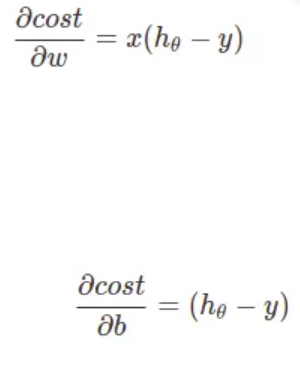

with abowe definition of gradiant of logistic regretion we implement the gradiant function

In [18]:
x = np.array([[1,2] , [3,4], [5,6], [7,8]])
print(x[0,0])

1


In [57]:
# 10 point
def gradient_cost_function(X, y, w, b, lambda_=0.1):
    '''
    Input:
        X  : numpy array with shape (m,d)
        y  : numpy array with shape (m,)
        w  : numpy array with shape (d,)
        b  : float
    Output:
        dw : gradient of cost function with respect to w.
             numpy array with shape (d,)
        db : gradient of cost function with respect to b.
             float.
    '''
    f=f_wb(X, w, b)
    dw1=lambda_*w[0]*len(y)
    dw2=lambda_*w[1]*len(y)
    db=0
    for i in range(len(y)):
      
      dw1 += X[i][0]*(f[i]-y[i])
      dw2 += X[i][1]*(f[i]-y[i])
      db += (f[i]-y[i])
    return[[dw1/len(y),dw2/len(y)],db/len(y)]

x = np.array([[1,2] , [3,4], [5,6], [7,8]])
y = np.array([1, 0, 0, 1])
w = np.array([0.2, -0.1])
b = 3

gradient_cost_function(x, y, w, b)

[[1.8918551699754562, 2.3254841564130446], 0.46362898643758815]

Next implement the function below to run gradient descent. make sure to print the cost function each 10 iteration of gradient descent.

In [33]:
print(11%10)

1


In [75]:
# 5 points
def gradient_descent(X, y, w, b, lr=1e-1, num_iter=100, lambda_=0.5):
    '''
    Input:
        X        : numpy array with shape (m,d)
        y        : numpy array with shape (m,)
        w        : numpy array with shape (d,)
        b        : float
        lr       : learning rate
        num_iter : iteration to run gradient descent. int
    Output:
        w        : w after iter run of gradient descent.
                   numpy array with shape (d,)
        b        : b after iter run of gradient descent.
                   numpy array with shape (d,)
    '''
    
    for i in range(num_iter):
      gradiant=gradient_cost_function(X, y, w, b)
      w1=w[0]-lr*gradiant[0][0]
      w2=w[1]-lr*gradiant[0][1]
      b=b-lr*gradiant[1]
      w=[w1,w2]
      if (i+1)%10 ==1 or (i+1)%100==1 or (i+1)%1000==1:
        print("iteration=",i+1,", cost=",J_wb(X, y, w, b))
    return w,b

x = np.array([[1,2] , [1,4], [5,6], [7,8]])
y = np.array([1, 0, 0, 1])
w = np.array([0.2, -0.1])
b = 3

w, b = gradient_descent(x, y, w, b)

iteration= 1 , cost= 0.9708250136608857
iteration= 11 , cost= 0.7701568468188447
iteration= 21 , cost= 0.7102766962116176
iteration= 31 , cost= 0.6783343653386849
iteration= 41 , cost= 0.6610476254670459
iteration= 51 , cost= 0.651284674521425
iteration= 61 , cost= 0.6454129010634746
iteration= 71 , cost= 0.641594625081195
iteration= 81 , cost= 0.6388902339784702
iteration= 91 , cost= 0.6368116096313772


now we have everything to train our model. Lets create our dummy dataset again. We initialize w randomly using a normal distribution. Initialize b with 0.

In [80]:
X, y = make_blobs(n_samples=600, centers=2, random_state=0, cluster_std=0.90)

w = np.random.normal(size=(2, ))
b = 0

We will use the function below to visualize the descion boundary(w) of logistic regression.

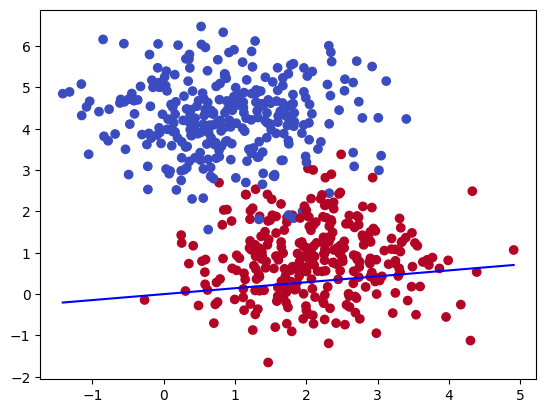

In [81]:
def visualize_boundary(X, y, w, b):
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
    plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
    plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
    plt.plot(plot_x, plot_y, c="b")
    
visualize_boundary(X, y, w, b)

it's finally time to train the model.

iteration= 1 , cost= 0.4774940099351156
iteration= 11 , cost= 0.3411815854879147
iteration= 21 , cost= 0.3080729754265255
iteration= 31 , cost= 0.2927905239498595
iteration= 41 , cost= 0.2844458364236891
iteration= 51 , cost= 0.27931896417548846
iteration= 61 , cost= 0.27582033863667443
iteration= 71 , cost= 0.27320129315759983
iteration= 81 , cost= 0.27108603398951286
iteration= 91 , cost= 0.2692770495894064
iteration= 101 , cost= 0.26766673537666347
iteration= 111 , cost= 0.26619462589157006
iteration= 121 , cost= 0.2648257044374333
iteration= 131 , cost= 0.2635390093295945
iteration= 141 , cost= 0.26232148757494694
iteration= 151 , cost= 0.26116461105547134
iteration= 161 , cost= 0.2600624838727132
iteration= 171 , cost= 0.2590107703088384
iteration= 181 , cost= 0.258006081203205
iteration= 191 , cost= 0.2570456194111587
accuracy model on train dataset=0.9633333333333334


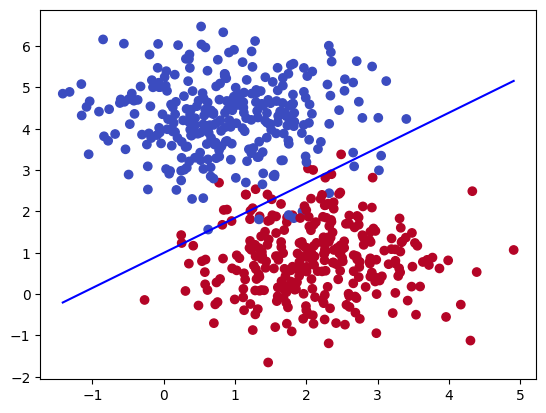

In [82]:
w, b = gradient_descent(X, y, w, b, num_iter=200)

print(f'accuracy model on train dataset={accuracy(X, y, w, b, prob_threshold=0.5)}')
visualize_boundary(X, y, w, b)

because our dataset is linearly seprable our model was able to find a good boundary. Now lets try the same thing but with a different dataset.

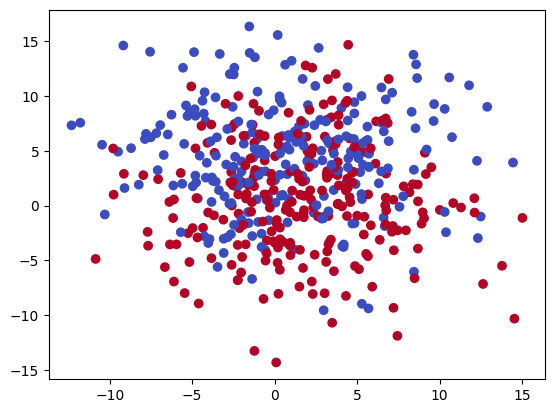

In [83]:
X, y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=5)
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')

w = np.random.normal(size=(2, ))
b = 0

iteration= 1 , cost= 1.7769315239777803
iteration= 11 , cost= 0.6313244686853099
iteration= 21 , cost= 0.6305467322154474
iteration= 31 , cost= 0.6300570779368403
iteration= 41 , cost= 0.6297099224415698
iteration= 51 , cost= 0.6294634030767265
iteration= 61 , cost= 0.6292881016846539
iteration= 71 , cost= 0.6291632919683847
iteration= 81 , cost= 0.6290743372266396
iteration= 91 , cost= 0.6290108795316011
iteration= 101 , cost= 0.628965575342655
iteration= 111 , cost= 0.6289332098092989
iteration= 121 , cost= 0.6289100744944857
iteration= 131 , cost= 0.6288935289927909
iteration= 141 , cost= 0.6288816913543205
iteration= 151 , cost= 0.6288732190025613
iteration= 161 , cost= 0.6288671534035367
iteration= 171 , cost= 0.6288628097556626
iteration= 181 , cost= 0.6288596985409272
iteration= 191 , cost= 0.6288574696666637
accuracy model on train dataset=0.676


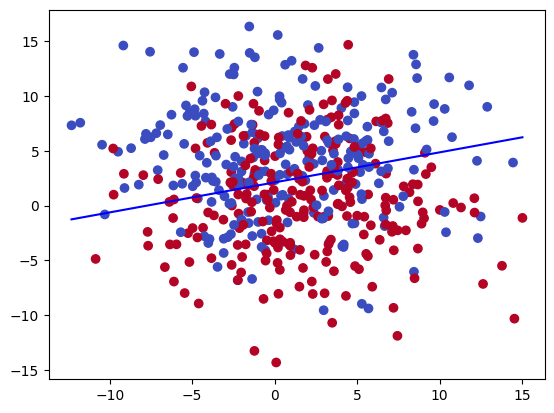

In [84]:
w, b = gradient_descent(X, y, w, b, num_iter=200)

print(f'accuracy model on train dataset={accuracy(X, y, w, b, prob_threshold=0.5)}')
visualize_boundary(X, y, w, b)

As you can see our model does not do very well in this case. In cases like this you can use more powerful models or add  higher dimension feature.

# 4 : Training on a Tweet Sentiment Analysis Dataset(Ungraded)

In this part we use the logistic regression model you implemented to classify whether a tweet contains a postivie or negative sentiment. You don't need to implement any code for this part. 

First we have to download our data. We will use the tweet dataset in nltk library. Which contains 5000 positive and 500 negative tweets.

In [85]:
import nltk
import string

nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [86]:
positive_tweets = nltk.corpus.twitter_samples.strings('positive_tweets.json')
negative_tweets = nltk.corpus.twitter_samples.strings('negative_tweets.json')

print(f'example positive tweet: {positive_tweets[0]}')
print(f'example negative tweet: {negative_tweets[0]}')

example positive tweet: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
example negative tweet: hopeless for tmr :(


we will use the function process_tweet to convert a tweet into a lists of word after removing any stopwords from it and stemming each word.

In [87]:
def process_tweet(tweet):
    stemmer = nltk.stem.PorterStemmer()
    stopwords_english = nltk.corpus.stopwords.words('english')

    tweet = tweet.replace('#','')

    tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  word not in string.punctuation): 
            stem_word = stemmer.stem(word) 
            tweets_clean.append(stem_word)

    return tweets_clean
  
process_tweet(positive_tweets[0])

['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']

In order to use logistic regression we need to represent each tweet as a fixed sized vector. We use a very simple idea to do this. First of all we will find the frequency of each word in the positive and negative classes.

We represent a tweet using a vector of two numbers. The first number is the sum of the positive frequency of each word of the tweet and the second number is the sum of the negative frequency of each word. For better performance we normalize this vector.

The following functions implement what we just talked about.

In [88]:
def create_freq(tweets):
  freq = {}
  for tweet in tweets:
    for word in process_tweet(tweet):
      if word in freq:
        freq[word] += 1
      else:
        freq[word] = 1
  return freq

freq_pos = create_freq(positive_tweets)
freq_neg = create_freq(negative_tweets)

In [89]:
def convert_tweet_to_vector(tweets, freq_pos, freq_neg):
  vectors = np.zeros((len(tweets), 2))
  for index, tweet in enumerate(tweets):
    for word in process_tweet(tweet):
      vectors[index][0] += freq_pos.get(word, 0)
      vectors[index][1] += freq_neg.get(word, 0)
    vectors[index] /= np.linalg.norm(vectors[index])
  return vectors 

pos_tweet_vectors = convert_tweet_to_vector(positive_tweets, freq_pos, freq_neg)
neg_tweet_vectors = convert_tweet_to_vector(negative_tweets, freq_pos, freq_neg)

print(pos_tweet_vectors[0:5])
print(neg_tweet_vectors[0:5])

[[0.99982849 0.01852011]
 [0.99375433 0.11159002]
 [0.99914153 0.04142719]
 [0.99999942 0.00107759]
 [0.99758745 0.06942102]]
[[4.35729806e-04 9.99999905e-01]
 [6.40935183e-02 9.97943897e-01]
 [4.54639164e-03 9.99989665e-01]
 [7.42553785e-03 9.99972430e-01]
 [6.28385297e-02 9.98023707e-01]]


Now lets create a train and test dataset. We choose the last 500 tweet of the positive and negative tweets as the test set and use the rest for training the model.

In [90]:
X_train = np.concatenate((pos_tweet_vectors[0:4500] , neg_tweet_vectors[0:4500]), axis=0)
Y_train = np.array([1] * 4500 + [0] * 4500)

X_test = np.concatenate((pos_tweet_vectors[4500:] , neg_tweet_vectors[4500:]), axis=0)
Y_test = np.array([1] * 500 + [0] * 500)

print(f'X_train shape={X_train.shape}, Y_train shape={Y_train.shape}')
print(f'X_test shape={X_test.shape}, Y_test shape={Y_test.shape}')

X_train shape=(9000, 2), Y_train shape=(9000,)
X_test shape=(1000, 2), Y_test shape=(1000,)


Now we can finally train our model and measure how well it does by alculating the accuracy on the test set.

In [91]:
w = np.random.normal(size=(2, ))
b = 0

w, b = gradient_descent(X_train, Y_train, w, b, num_iter=120)

print(f'accuracy model on train dataset={accuracy(X_train, Y_train, w, b, prob_threshold=0.5)}')
print(f'accuracy model on test dataset={accuracy(X_test, Y_test, w, b, prob_threshold=0.5)}')

iteration= 1 , cost= 0.7176612880857335
iteration= 11 , cost= 0.6145662547260664
iteration= 21 , cost= 0.5537918099799245
iteration= 31 , cost= 0.5164436969850734
iteration= 41 , cost= 0.4925978193459414
iteration= 51 , cost= 0.476925082945737
iteration= 61 , cost= 0.4664058455150603
iteration= 71 , cost= 0.45923478697990916
iteration= 81 , cost= 0.4542854957281616
iteration= 91 , cost= 0.45083301638945716
iteration= 101 , cost= 0.4484004485543059
iteration= 111 , cost= 0.44666916015368946
accuracy model on train dataset=0.9957777777777778
accuracy model on test dataset=0.994


You can use the model to classify your own tweets.

In [92]:
def classify_tweet(tweet, w, b, prob_threshold=0.5):
  vector = convert_tweet_to_vector([tweet], freq_pos, freq_neg)
  p = f_wb(vector, w, b)
  if p[0]>prob_threshold:
    print('positive :)')
  else:
    print('negative :(')

In [93]:
classify_tweet('I am happy.', w , b)

positive :)


In [94]:
classify_tweet('I am sad.', w , b)

negative :(
